In [ ]:
pip install powerlaw

In [ ]:
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
%matplotlib inline

In [ ]:
def plot_dist(G):
    # G: NetworkX граф объект байна.

    # 1. Графыг SciPy-ийн sparse matrix руу хөрвүүлнэ.
    M = nx.to_scipy_sparse_matrix(G)

    # 2. Графын бүх оройн degree-үүдийг авч, хамгийн бага degree-г олж байна.
    xmin = min([d[1] for d in G.degree()])

    # 3. SciPy sparse matrix-ыг баганын нийлбэрээр сумлана.
    indegrees = M.sum(0).A[0]

    # 4. indegrees дахь утгуудын давтамжийг тооцоолохын тулд np.bincount-г ашиглана.
    degree = np.bincount(indegrees)

    # 5. powerlaw Fit-г гүйцэтгэнэ.
    fit = powerlaw.Fit(np.array(degree) + 1, fit_method='KS')

    # 6. 16x6 хэмжээтэй зургийн талбайг үүсгэж байна.
    fig = plt.figure(figsize=(16, 6))

    # 7. "Plot Distribution" буюу degree-ийн тархалтыг зурах хэсэг:
    plt.subplot(1, 3, 1)
    # x-н утга: индексүүд (degree-ийн утгуудын дугаар), y-н утга: оройн тоо.
    plt.plot(range(len(degree)), degree, 'b.')
    plt.loglog()
    # x талыг хамгийн бага ба хамгийн их degree утгатай хязгаарлана.
    plt.xlim((min(degree), max(degree)))
    plt.xlabel('Degree')
    plt.ylabel('P(k)')

    # 8. "Plot CDF" буюу Цогц тархалтын функц (Cumulative Distribution Function)-ыг зурах:
    plt.subplot(1, 3, 2)
    # powerlaw fit объектын plot_cdf() функцээр эмпирик CDF-г зурах.
    fit.plot_cdf()
    plt.xlabel("Degree")
    plt.ylabel('CDF')

    # 9. "Plot CCDF" буюу Complementary CDF-г зурах хэсэг:
    plt.subplot(1, 3, 3)
    # powerlaw-ийн PDF-г тохируулан зурах; өнгийг улаан, зурагийн хэв маягийг зурах.
    fit.power_law.plot_pdf(color='r', linestyle='--', label='fit ccdf')
    # Эмпирик CCDF-г зурах функц.
    fit.plot_ccdf()
    plt.xlabel('Degree')
    plt.ylabel('CCDF')

    # 10. Зурагнуудыг цэгцтэй байрлуулах.
    plt.tight_layout()
    plt.show()

    # 12. Фитингийн үр дүнгийн параметрүүдийг хэвлэнэ: альфа ба сигма утгууд.
    print(f'alpha={fit.power_law.alpha+1} sigma={fit.power_law.sigma}')


# 1.Barabasi-Albert (scale-free) graphs

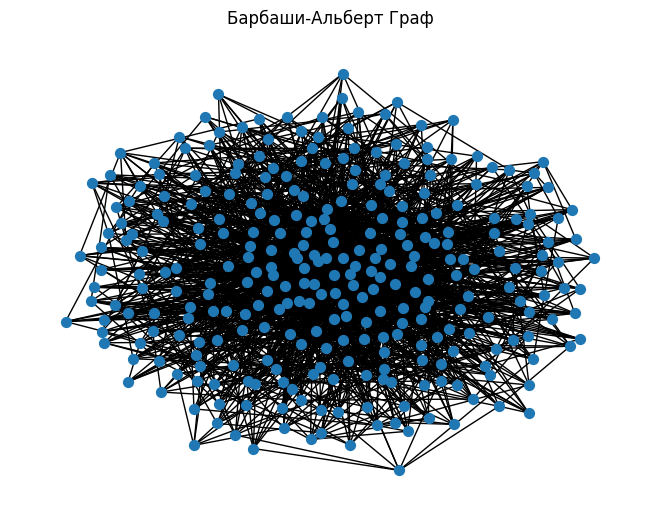

In [ ]:
m = 7

# 300 оройтой Барбаши-Альберт графыг үүсгэнэ.
ba = nx.barabasi_albert_graph(300, m)

# Графыг зурах:
nx.draw(ba, node_size=50, with_labels=False)

# Графын гарчигыг тохируулна.
plt.title("Барбаши-Альберт Граф")
plt.show()


# Оройн тархалтыг powerlaw fit ашиглан харвал

In [ ]:
def plot_dist(G):
  M = nx.to_scipy_sparse_array(G)  # Графын хөрвүүлэлт: NetworkX-ээс SciPy-ийн сийрэг массив руу хөрвүүлж байна.
  xmin = min([d[1] for d in G.degree()])  # Графын хамгийн бага зэрэг (degree)-ийг тодорхойлж байна.
  indegrees = M.sum(0).A[0]  # Оролтын зэргүүдийг тооцоолж байна.
  degree = np.bincount(indegrees)  # Зэргийн тархалтыг олж байна.
  fit = powerlaw.Fit(np.array(degree)+1, fit_method='KS')  # Power-law тархалт тохируулах (KS арга ашиглаж байна).

  fig = plt.figure(figsize=(16, 6))  # Зураг дүрслэх тохиргоо.

  """ Зэргийн тархалтын график """
  plt.subplot(1, 3, 1)
  plt.plot(range(len(degree)), degree, 'b.')  # Зэргийн тархалтыг цэгэн графикаар харуулж байна.
  plt.loglog()  # Лог-шугаман масштаб ашиглаж байна.
  plt.xlim((min(degree), max(degree)))  # X тэнхлэгийн хязгаарлалт.
  plt.xlabel('Degree')  # X тэнхлэгийн нэр.
  plt.ylabel('P(k)')  # Y тэнхлэгийн нэр.

  """ Хуримтлагдсан тархалтын функц (CDF) """
  plt.subplot(1, 3, 2)
  fit.plot_cdf()  # CDF-г дүрслэж байна.
  plt.xlabel("Degree")
  plt.ylabel('CDF')

  """ Буюу Complementary CDF (CCDF) """
  plt.subplot(1, 3, 3)
  fit.power_law.plot_pdf(color='r', linestyle='--', label='fit ccdf')  # CCDF-г дүрслэхдээ power-law тохиргоо ашиглаж байна.
  fit.plot_ccdf()  # CCDF-г дүрслэж байна.
  plt.ylabel('CCDF')
  plt.xlabel('Degree')

  plt.tight_layout()  # Графикуудын байрлалыг зөв байршуулна.
  plt.show()  # Зураг харуулах.

  print(f'alpha={fit.power_law.alpha+1} sigma={fit.power_law.sigma}')  # Power-law тохиргооны параметрүүдийг хэвлэх.


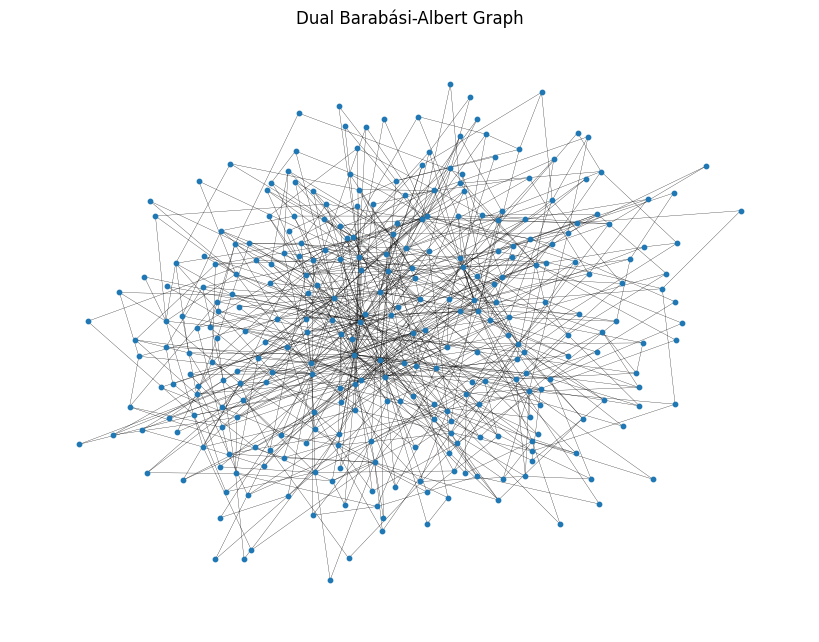

In [ ]:
n = 300  # Оргилуудын (төмөр замын зогсоол гэх мэт) нийт тоо
m = 3  # Шинээр нэмэгдэх зангилаа (node) нь холбогдох эхний ирмэгийн тоо
m2 = 2  # Зарим зангилаа нь холбогдох бага зэргийн тоо (жишээ нь, шинэ нийгмийн бүлгүүд)
p = 0.7  # Хоёр өөр холболтын механизмын шилжилтийн магадлал

# Dual Barabási-Albert загвар ашиглан граф үүсгэх
dual_ba = nx.dual_barabasi_albert_graph(n, m, m2, p)

# Граф дүрслэх
plt.figure(figsize=(8, 6))
nx.draw(dual_ba, node_size=10, width=0.2, with_labels=False)  # Бага хэмжээтэй зангилаа, шугамын зузааныг багасгасан
plt.title("Dual Barabási-Albert Graph")  # Гарчиг
plt.show()  # Зураг харуулах


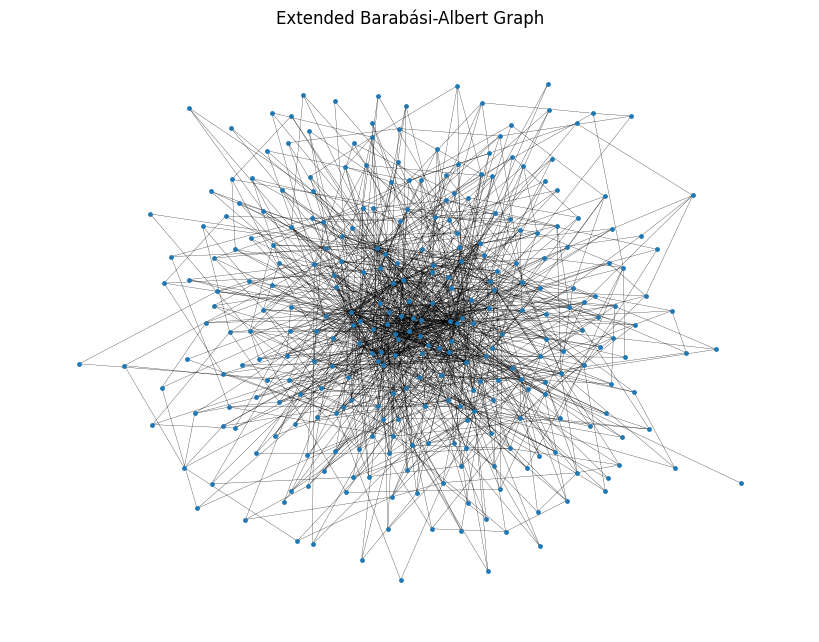

In [ ]:
n = 300  # Оргилуудын нийт тоо (жишээ нь, хүмүүс, хотууд гэх мэт)
m = 3  # Шинээр нэмэгдэх зангилаа нь холбогдох эхний ирмэгийн тоо
p = 0.2  # Шинээр нэмэгдэх ирмэг нь санамсаргүйгээр холбогдох магадлал
q = 0.4  # Шинээр үүсэх ирмэгүүд нь одоо байгаа ирмэгүүдийг хуулбарлах магадлал

# Өргөтгөсөн Barabási-Albert загвараар граф үүсгэх
extended_ba = nx.extended_barabasi_albert_graph(n, m, p, q)

# Граф дүрслэх
plt.figure(figsize=(8, 6))
nx.draw(extended_ba, node_size=6, width=0.2, with_labels=False)  # Бага хэмжээтэй зангилаа, нимгэн ирмэг
plt.title("Extended Barabási-Albert Graph")  # Гарчиг
plt.show()  # Зураг харуулах


Calculating best minimal value for power law fit


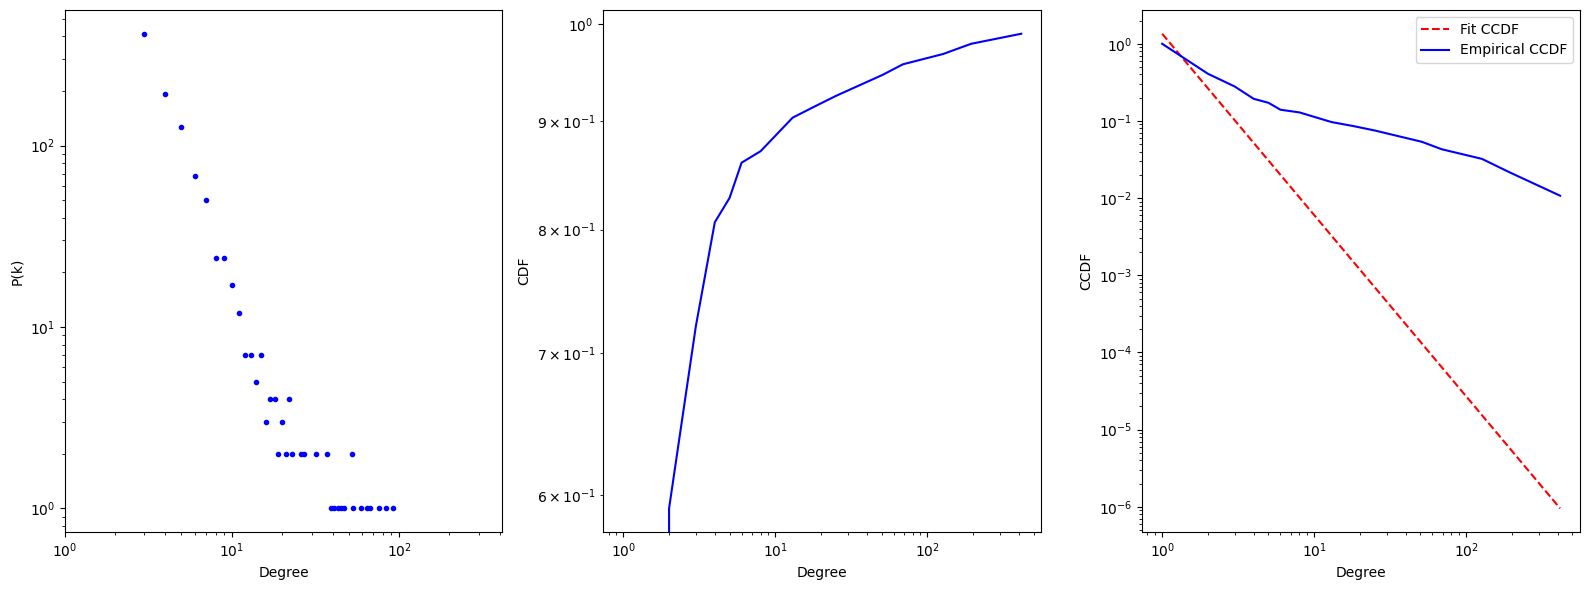

alpha = 3.35 sigma = 0.14


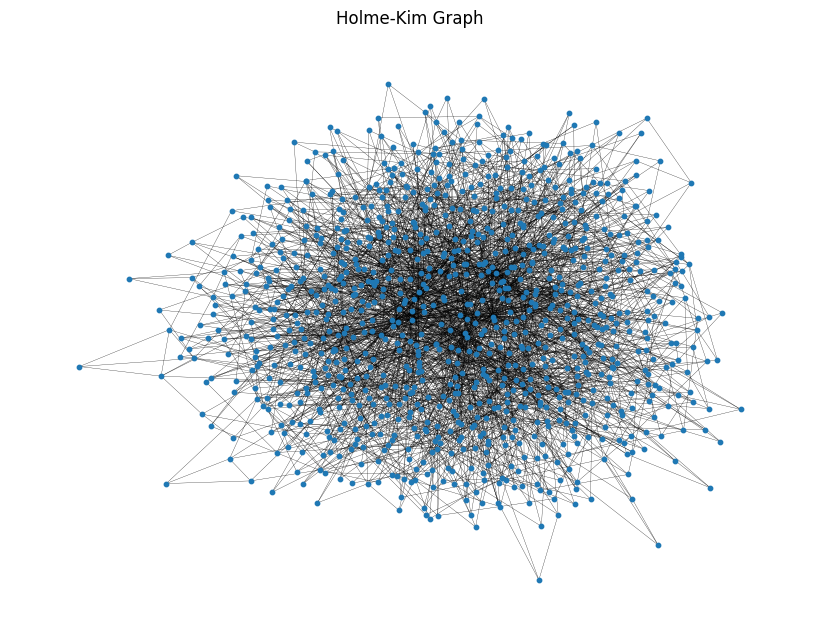

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import powerlaw

def plot_dist(G):
    # Графыг SciPy-ийн сийрэг массив руу хөрвүүлэх
    M = nx.to_scipy_sparse_array(G)

    # Графын зангилааны зэргийг олж, нэг хэмжээст массив болгон хөрвүүлэх
    indegrees = np.array(M.sum(axis=0)).flatten()

    # Зэргийн давтамжийг тооцоолох
    degree_counts = np.bincount(indegrees.astype(int))

    # Power-law тархалтыг тохируулах (0-ээс зайлсхийхийн тулд 1 нэмсэн)
    fit = powerlaw.Fit(np.array(degree_counts) + 1, fit_method='KS')

    # 3 хэсэгтэй график үүсгэх
    fig = plt.figure(figsize=(16, 6))

    # 1. Зэргийн тархалтын график
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree_counts)), degree_counts, 'b.')  # Цэгэн график
    plt.loglog()  # Лог-шугаман масштаб ашиглах
    # Хамгийн бага зэрэг 0 биш эсэхийг шалгаж, хязгаар тогтоох
    nonzero_degrees = degree_counts[degree_counts > 0]
    plt.xlim((min(nonzero_degrees), max(degree_counts)))
    plt.xlabel('Degree')  # X тэнхлэгийн нэр
    plt.ylabel('P(k)')  # Y тэнхлэгийн нэр

    # 2. Тохирсон тархалтын хуримтлагдсан функц (CDF)
    plt.subplot(1, 3, 2)
    fit.plot_cdf(color='blue', label='Empirical CDF')  # Туршилтын CDF
    plt.xlabel("Degree")
    plt.ylabel("CDF")

    # 3. Харгалзах CCDF болон power-law тохиргоог дүрслэх
    plt.subplot(1, 3, 3)
    fit.power_law.plot_pdf(color='r', linestyle='--', label='Fit CCDF')  # Тохирсон CCDF
    fit.plot_ccdf(color='blue', label='Empirical CCDF')  # Туршилтын CCDF
    plt.xlabel("Degree")
    plt.ylabel("CCDF")
    plt.legend()  # Тайлбар нэмэх

    plt.tight_layout()  # Графикуудын байрлалыг зөв тохируулах
    plt.show()  # Графикийг харуулах

    print(f'alpha = {fit.power_law.alpha + 1:.2f} sigma = {fit.power_law.sigma:.2f}')  # Power-law тохиргооны утгуудыг хэвлэх

def main():
    # Holme-Kim загварын параметрүүд
    n = 1000   # Зангилааны (нодуудын) нийт тоо
    m = 3      # Шинээр нэмэгдэх зангилаа нь холбогдох эхний ирмэгийн тоо
    p = 0.3    # Санамсаргүй ирмэг нэмсний дараа гурвалжин үүсэх магадлал

    # Holme-Kim (powerlaw_cluster) загвараар граф үүсгэх
    holme_kim = nx.powerlaw_cluster_graph(n, m, p)

    # Графын зэргийн тархалтыг дүрслэх
    plot_dist(holme_kim)

    # Графыг дүрслэх
    plt.figure(figsize=(8, 6))
    nx.draw(holme_kim, node_size=10, width=0.2, with_labels=False)  # Бага хэмжээтэй зангилаа, нимгэн ирмэгүүд
    plt.title("Holme-Kim Graph")  # Гарчиг
    plt.show()  # Графыг харуулах

# Гол програмыг ажиллуулах
if __name__ == "__main__":
    main()


In [ ]:
def floyd_warshall(dist):
    """
    Флойд-Уоршаллын алгоритм:
    - dist матрицын i->j замуудын хамгийн богино замыг тооцоолно.
    - dist[i][j] = шууд ирмэгийн жин (байхгүй бол float('inf'))
    - i == j үед 0 утгатай байна.
    """
    n = len(dist)
    for k in range(n):
        for i in range(n):
            for j in range(n):
                # Шаардлагатай бол дамжин өнгөрөх замаар сайжруулалт хийх
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]


def compute_metrics(dist):
    """
    Флойд-Уоршаллаар тооцсон dist матрицаас дараах хэмжигдэхүүнийг гаргана:
    1) Дундаж зай (Average Distance)
    2) Диаметр (Diameter) - хамгийн хол зайтай оройн хос
    3) Радиус (Radius) - хамгийн ойр оройн хос
    """
    n = len(dist)
    sum_dist = 0  # Бүх хосын зайн нийлбэр
    count = 0      # Холбогдсон хосын тоо
    eccentricities = [0] * n  # Орой бүрийн хамгийн хол орой руу очих зай

    for i in range(n):
        max_d = 0  # i-р оройн хувьд хамгийн хол зайтай орой
        for j in range(n):
            if i != j and dist[i][j] != float('inf'):
                d_ij = dist[i][j]
                sum_dist += d_ij
                count += 1
                if d_ij > max_d:
                    max_d = d_ij
        eccentricities[i] = max_d

    # Дундаж зай = нийт холбогдсон хосын дундаж
    average_distance = sum_dist / count if count > 0 else 0

    # Диаметр = эксцентрицитетийн хамгийн их утга
    diameter = max(eccentricities)
    # Радиус = эксцентрицитетийн хамгийн бага утга
    radius = min(eccentricities)

    return average_distance, diameter, radius


def per_node_avg_distance(dist):
    """
    Орой бүрийн бусад бүх орой руу очих дундаж зайг олно.
    """
    n = len(dist)
    avg_list = []
    for i in range(n):
        sum_i = 0
        count_i = 0
        for j in range(n):
            if i != j and dist[i][j] != float('inf'):
                sum_i += dist[i][j]
                count_i += 1
        avg_list.append(sum_i / count_i if count_i > 0 else float('inf'))
    return avg_list


def main():
    import math

    # Хязгааргүйг тэмдэглэх INF утга
    INF = float('inf')

    # Жишээний adjacency matrix
    dist = [
        [0, 1, 5, 3, 3, 7, 2],
        [1, 0, 5, 2, 4, 7, 3],
        [5, 5, 0, 7, 4, 2, 3],
        [3, 2, 7, 0, 6, 9, 5],
        [3, 4, 4, 6, 0, 6, 1],
        [7, 7, 2, 9, 6, 0, 5],
        [2, 3, 3, 5, 1, 5, 0]
    ]

    # Флойд-Уоршаллын алгоритмыг ажиллуулж, dist матрицыг шинэчлэх
    floyd_warshall(dist)

    # Дундаж зай, диаметр, радиусыг тооцоолох
    avg_dist, diam, rad = compute_metrics(dist)

    print(f"Дундаж зай (Average Distance) = {avg_dist:.2f}")
    print(f"Диаметр (Diameter)           = {diam}")
    print(f"Радиус (Radius)             = {rad}")

    # Орой бүрийн бусад руу очих дундаж зайг тооцох
    node_avg = per_node_avg_distance(dist)

    # Дундаж зайг хоёр орон хүртэл бөөрөнцөглөн хэвлэх
    rounded_avg = [round(x, 2) for x in node_avg]
    print("Орой бүрийн дундаж зай:", rounded_avg)

    # Эрэмбэлсэн дундаж зайн жагсаалт
    sorted_avg = sorted(rounded_avg)
    print("Эрэмбэлсэн дундаж зай:", sorted_avg)


if __name__ == "__main__":
    main()


Дундаж зай (Average Distance) = 4.29
Диаметр (Diameter)           = 9
Радиус (Radius)             = 5
Орой бүрийн дундаж зай: [3.5, 3.67, 4.33, 5.33, 4.0, 6.0, 3.17]
Эрэмбэлсэн дундаж зай: [3.17, 3.5, 3.67, 4.0, 4.33, 5.33, 6.0]
